# Exercise 1: Creating a Canvas for Drawing Shapes

> 💬 Let’s write code to practice OOP - Object-Oriented Programming in Python


## Setup

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("✅ Packages imported")

✅ Packages imported


## 🏃‍♂️ An accelerator

### 🖍️ Color

In [ ]:
class Color:
    # Define color constants
    RED = '#FF0000'
    GREEN = '#00FF00'
    BLUE = '#0000FF'
    YELLOW = '#FFFF00'
    PURPLE = '#800080'
    ORANGE = '#FFA500'
    PINK = '#FFC0CB'
    BROWN = '#A52A2A'
    GRAY = '#808080'
    BLACK = '#000000'
    WHITE = '#FFFFFF'

class TerminalTextColor:
    RESET = "\033[0m"  # Reset to default color
    RED = "\033[91m"    # Red color
    GREEN = "\033[92m"  # Green color
    YELLOW = "\033[93m" # Yellow color
    BLUE = "\033[94m"   # Blue color

### 📈 how to draw a polygons with `pyplot` of `*matplotlib*`

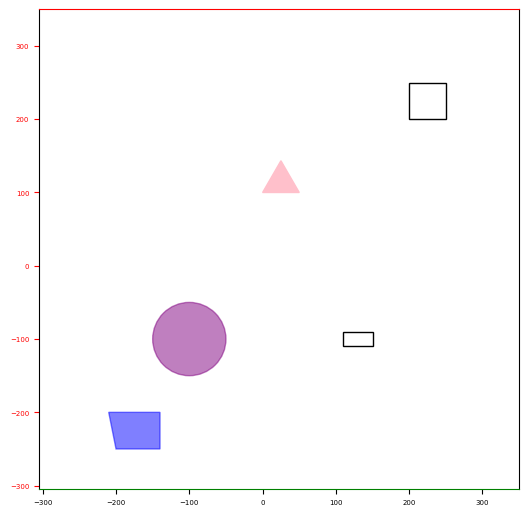

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Function to draw a circle
def draw_circle(radius, ax):
  x1 = -100 # initial coordinates
  y1 = -100
  # The initial coordinates of a circle are in its center.
  circle = patches.Circle((x1, y1), radius, fill=True, alpha=0.5, color=Color.PURPLE)
  ax.add_patch(circle)

# Function to draw a triangle
def draw_triangle(side, ax):
    x1 = 0 # initial coordinates
    y1 = 100
    x = [x1, side + x1, side / 2 + x1, x1]
    y = [y1, y1, (3**0.5) * side / 2 +y1, y1]
    triangle = patches.Polygon(list(zip(x, y)), fill=True, color=Color.PINK)
    ax.add_patch(triangle)

# Function to draw a square
def draw_square(side, ax):
    x1 = 200 # initial coordinates
    y1 = 200
    square = patches.Rectangle((x1, y1), side, side, fill=False)
    ax.add_patch(square)

def draw_rectangle( height, width, ax):
  x1 = 110 # initial coordinates
  y1 = -110
  square = patches.Rectangle((x1, y1), height, width, fill=False)
  ax.add_patch(square)

def draw_polygon( vertices:list):
  if len(vertices) < 3:
    print("Sorry, I cannot draw this polygon with less than 3 vertices")
  # polygon do not have initial coordinates, the vertices (x,y) must be in the canvas limits.
  x = [v[0] for v in vertices]
  y = [v[1] for v in vertices]

  # to close the polygon
  if x[0] == x[-1] and y[0] == y[-1]:
    x.append(x[0])
    y.append(y[0])

  square = patches.Polygon(list(zip(x, y)), fill=True, color="blue", alpha=0.5)
  ax.add_patch(square)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Draw a circle
draw_circle(50, ax)

# Draw a triangle
draw_triangle(50, ax)

# Draw a square
draw_square(50, ax)

# Draw a rectangle
draw_rectangle(40,20, ax)

draw_polygon(vertices = [
    (-200, -250),  # Vertex 1
    (-140, -250),  # Vertex 2
    (-140, -200),  # Vertex 3
    (-210, -200),
    (-200, -250)

])

# Set axis limits
ax.set_xlim(-305, 350)
ax.set_ylim(-305, 350)

# how to change the color of canvas box
ax.spines['bottom'].set_color('green')
ax.spines['top'].set_color(Color.RED)
ax.spines['right'].set_color('#000')
ax.spines['left'].set_color('#000')

# how to change the text color of axes
ax.tick_params(axis='x', colors='#000')
ax.tick_params(axis='y', colors='red')

# how to change the text color of axes
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)

# Show axes or not
#plt.gca().set_axis_off()
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

# show
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.show()



## 😎 Your solution

### 👋 Shape class

Shapes are abstractions of Circles, Squares, Triangles, Rectangles, and Polygons. They (each type of shape) must have the following features:

- `initial_coordinates` (`x`,`y`) in the canvas.
- `color` (one color of a list of `Colors`).
- `fill` (`True` or `False`).
- **shape_attributes** represent the characteristics of a shape, and each type of shape has its unique way of being described. So, they will vary according to the shape type. For example, the term `side` specifically refers to a square because `squares` have all their sides equal in length. In contrast, the `radius` represents a `circle`.
- method to `draw` the shape.
- method to expose the **shape_attributes**, to describe the shape in strings to explain its state.
- `alpha`: (num from 0 to 1).
- the `constructor` must receive all the attributes while creating a shape.
    - Remember, you can use `overload` to call the constructor in different ways.
    - The default behavior of a shape is:
        - not to `fill` the shape;
        - the default `color` is `green` and
        - the alpha is 0.5.

<aside>
🚧 You need to decide where will be the attributes and how to define the signature of methods and construction in the shapes hierarchy.

</aside>

### 👨🏻‍💻 Code:

In [ ]:
class Shape:
  color: Color = Color.BLACK
  #x1: int = 0
  #y1: int = 0
  fill: bool = False
  alpha: float = 1

  def __init__(self,
      #x1: int = 0, y1: int = 0,
      xy: tuple = (0,0),
      color: Color = Color.BLACK,
      fill: bool = False, alpha: float=1
  ):
    """
    Shape class constructor
    """
    self.color = color
    self.xy = xy
    #self.x1 = x1
    #self.y1 = y1
    self.fill = fill
    self.alpha = alpha

  def draw(self):
    """
    Abstrac method, must be implemented by subclasses.

    """
    return "⚠️ I am an abstract method, I do not represent any shape"

  def __str__(self):
    shift = "   "
    #return 'from new __str__: ' + object.__str__(self)
    class_name = str(type(self)).split('.')[-1].replace("'>","")

    return f"\n💬 Class: {class_name}. \n{shift}Attributes: {self.__dict__}"
    # + str(self.__dict__)

  def print__str__fancy(self):
    """
    print the class description in a "fancy" way 😎
    """
    shift = "   "
    attributes = ""
    n_repeat = 80

    class_name = str(type(self)).split('.')[-1].replace("'>","")

    print(f"👋 Class: {TerminalTextColor.GREEN}{class_name}{TerminalTextColor.RESET}\n{'-' * n_repeat}")

    for k in self.__dict__:
      attributes += f"\n{shift}{shift}- {k}: {TerminalTextColor.BLUE}{self.__dict__[k]}{TerminalTextColor.RESET}"

    print(f"\n{shift}🏷️ Attributes: ")
    print(attributes)

    print(f"\n{shift}⚡️ Draw method return ")
    print(f'\n{shift}{shift}-{str(self.draw())}')

    title ='- the end -'
    print(f'\n{title}{"-" * (n_repeat-len(title))}')


# ------------------------------------------------------------------------------
# code to test the class:
s = Shape()
print(s.draw())
print(s.__str__())

⚠️ I am an abstract method, I do not represent any shape

💬 Class: Shape. 
   Attributes: {'color': '#000000', 'xy': (0, 0), 'fill': False, 'alpha': 1}


In [ ]:
s.print__str__fancy()

👋 Class: Shape
--------------------------------------------------------------------------------

   🏷️ Attributes: 

      - color: #000000
      - xy: (0, 0)
      - fill: False
      - alpha: 1

   ⚡️ Draw method return 

      -⚠️ I am an abstract method, I do not represent any shape

- the end ----------------------------------------------------------------------


### 👋 Circle Class

- Purpose: Represents a circle shape
- Tip: shape_attributes ****`radius`

### 👨🏻‍💻 Code:

In [ ]:
class Circle(Shape):
  radius: int
  def __init__(self,
    radius: int,
    xy: tuple,
    #x1: int = 0, y1: int = 0,
    color: Color = Color.BLACK,
    fill: bool = False, alpha: float=1
  ):
    super().__init__( color=color, xy=xy, fill=fill, alpha=alpha)
    self.radius = radius

  def draw(self):
    """
    Methdod that returns a representation of the shape by using `matplotlib.patches`.
    This object creates shapes representation that can be ploted by a canvas (`matplotlib.pyplot`).

    * Remark: You need a canvas (`matplotlib.pyplot`) that plots the shape representation.
    """
    return patches.Circle(
      xy = self.xy,
      radius = self.radius,
      fill=self.fill,
      alpha=self.alpha,
      color=self.color
    )

  #def __str__(self):
  #  return f"Class: {str(type(self)).split('.')[-1]}" + str(self.__dict__)


# ------------------------------------------------------------------------------
# code to test the class:
c1 = Circle(xy=(50,50), radius=10)
c1.print__str__fancy()

👋 Class: Circle
--------------------------------------------------------------------------------

   🏷️ Attributes: 

      - color: #000000
      - xy: (50, 50)
      - fill: False
      - alpha: 1
      - radius: 10

   ⚡️ Draw method return 

      -Circle(xy=(50, 50), radius=10)

- the end ----------------------------------------------------------------------


### 👋 Square class


- Purpose: Represents a square shape.
- Tip: shape_attributes ****`side`

### 👨🏻‍💻 Code

In [ ]:
class Square(Shape):
  side: int
  def __init__(self, side: int, xy: tuple, color: Color = Color.BLUE, fill: bool = False, alpha: float=1):
    super().__init__(color=color, xy=xy, fill=fill, alpha=alpha)
    self.side = side

  def draw(self):
    """
    Methdod that returns a representation of the shape by using `matplotlib.patches`.
    This object creates shapes representation that can be ploted by a canvas (`matplotlib.pyplot`).

    * Remark: You need a canvas (`matplotlib.pyplot`) that plots the shape representation.
    """
    return patches.Rectangle(
      xy = self.xy,
      width = self.side,
      height = self.side,
      fill=self.fill,
      alpha= self.alpha,
      color=self.color
    )

# ------------------------------------------------------------------------------
s1 = Square(xy=(10,10), side=10)
s1.print__str__fancy()

👋 Class: Square
--------------------------------------------------------------------------------

   🏷️ Attributes: 

      - color: #0000FF
      - xy: (10, 10)
      - fill: False
      - alpha: 1
      - side: 10

   ⚡️ Draw method return 

      -Rectangle(xy=(10, 10), width=10, height=10, angle=0)

- the end ----------------------------------------------------------------------


### 👋 Rectangle class


- Purpose: Represents a rectangle shape.
- Tip: shape_attributes ****`height` and `width` to store the dimensions of the rectangle.

### 👨🏻‍💻 Code:

In [ ]:
class Rectangle(Shape):
  width: int
  height: int
  def __init__(self,
    width: int, height: int, xy:tuple,
    color: Color = Color.BLACK, fill: bool = False, alpha: float=1
  ):
    super().__init__(color=color, xy=xy, fill=fill, alpha=alpha)
    self.width = width
    self.height = height

  def draw(self):
    """
    Methdod that returns a representation of the shape by using `matplotlib.patches`.
    This object creates shapes representation that can be ploted by a canvas (`matplotlib.pyplot`).

    * Remark: You need a canvas (`matplotlib.pyplot`) that plots the shape representation.
    """
    return patches.Rectangle(
      xy = self.xy,
      width = self.width,
      height = self.height,
      fill = self.fill,
      alpha = self.alpha,
      color=self.color
    )

# ------------------------------------------------------------------------------
s1 = Rectangle(xy = (120,20), width =10, height=10)
s1.print__str__fancy()

👋 Class: Rectangle
--------------------------------------------------------------------------------

   🏷️ Attributes: 

      - color: #000000
      - xy: (120, 20)
      - fill: False
      - alpha: 1
      - width: 10
      - height: 10

   ⚡️ Draw method return 

      -Rectangle(xy=(120, 20), width=10, height=10, angle=0)

- the end ----------------------------------------------------------------------


### 👋 Equilateral Triangle Class (Subclass of Shape):



- Purpose: Represents an equilateral triangle shape.
- Tip: shape_attributes ****`side`

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230303184252/Equilateral-Triangle-3.png" width="400px"/>

### 👨🏻‍💻 Code

In [ ]:
class EquilateralTriangle(Shape):
  side: int
  def __init__(self,
    side: int,
    xy:tuple,
    color: Color = Color.BLACK, fill: bool = False, alpha: float=1
  ):
    super().__init__(color=color, xy=xy, fill=fill, alpha=alpha)
    self.side = side

  def draw(self):
    """
    Methdod that returns a representation of the shape by using `matplotlib.patches`.
    This object creates shapes representation that can be ploted by a canvas (`matplotlib.pyplot`).

    * Remark: You need a canvas (`matplotlib.pyplot`) that plots the shape representation.
    """
    xs = [self.xy[0], self.side + self.xy[0], self.side / 2 + self.xy[0], self.xy[0]]
    ys = [self.xy[1], self.xy[1], (3**0.5) * self.side / 2 + self.xy[1], self.xy[1]]

    return patches.Polygon(
      list(zip(xs, ys)),
      fill=self.fill,
      alpha=self.alpha,
      color=self.color
    )

# ------------------------------------------------------------------------------
# Code to test the class:
t1 = EquilateralTriangle(xy = (30,30), side=10)
t1.print__str__fancy()

👋 Class: EquilateralTriangle
--------------------------------------------------------------------------------

   🏷️ Attributes: 

      - color: #000000
      - xy: (30, 30)
      - fill: False
      - alpha: 1
      - side: 10

   ⚡️ Draw method return 

      -Polygon4((30, 30) ...)

- the end ----------------------------------------------------------------------


### 👋 FreePolygon Class:



- Purpose: Represents any polygon; it is drawn by coordinates (3 or more x,y pairs of coordinates).
- Decide if you will inherit from Shape or not. Please explain why.
    - All the rules that apply to regular shapes also apply to FreePolygon, except for the initial coordinates and the shape_attributes, which represent coordinates within the canvas.
- Tip: shape_attributes ****`list of coordinates(x,y)` ****

<div style="background-color:white;">
<img src="https://static.javatpoint.com/definition/images/polygon.png" width="400px" ></img>
</div>

### 👨🏻‍💻 Code:

In [ ]:
class FreePolygon:
  ...

> 🤔 Write your decision:
>
> - Decide if you will inherit from Shape or not. Please  explain why.
>    - All the rules that apply to regular shapes also apply to FreePolygon, except for the initial coordinates and the shape_attributes, which represent coordinates within the canvas.

```
My decision is...
```

> <font color="LightGreen">It will be discussed in the next class.</font>

### 👋 Canvas Class

### 👨🏻‍💻 Code:

In [ ]:
class Canvas:
  # constructor
  def __init__(self,
    width_range: tuple = (-300, 300), height_range: tuple = (-200,200),
    box_color : Color = Color.GRAY, axes_text_color: Color = Color.GRAY,
    axes_text_size = 5,
  ):
    self.background_color = Color.WHITE

    self.width_range = width_range
    self.height_range = height_range

    self.box_color = box_color
    self.axes_text_size = axes_text_size
    self.axes_text_color = axes_text_color

    # self.__ax_refresh()

  def __ax_refresh(self):
    self.fig, self.ax = plt.subplots()

    # Set axis limits
    self.ax.set_xlim(self.width_range[0], self.width_range[1])
    self.ax.set_ylim(self.height_range[0], self.height_range[1])

    # Set the aspect ratio to be equal
    self.ax.set_aspect('equal')

    self.change_box_color(self.box_color)
    self.change_axes_text_color(self.axes_text_color)


  # method
  def change_box_color(self, color: Color):
    self.ax.spines['bottom'].set_color(color)
    self.ax.spines['top'].set_color(color)
    self.ax.spines['right'].set_color(color)
    self.ax.spines['left'].set_color(color)

  # method
  def change_axes_text_color(self, color: Color):
    self.ax.tick_params(axis='x', colors=color)
    self.ax.tick_params(axis='y', colors=color)

  # method
  def render(self, shapes:list[Shape], show_box=True, show_coordinates=True):

    # ax
    self.__ax_refresh()

    # Change the behavior of the canvas box and its coordinates
    if not show_box:
      self.change_box_color(self.background_color)
    if not show_coordinates:
      self.change_axes_text_color(self.background_color)

    # Print Shapes
    for shape in shapes:
      self.ax.add_patch(shape.draw())

    # PLT
    plt.yticks(fontsize=self.axes_text_size)
    plt.xticks(fontsize=self.axes_text_size)

    # Show the plot
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(50, 50)
    plt.show()


## 👋 Instances and Draw the shapes

You'll make objects from these classes, define their characteristics, and use the "draw" method to display the shapes on the canvas. Make sure to draw at least one shape of each type, varying their sizes and colors.

### Instances

💡 Example:
```python
circle_1 = Circle(...)
```

### 👨🏻‍💻 Code

In [ ]:
# circle_1 = Circle(...)
shapes = []

c1 = Circle(xy = (50, 50), radius=10, color = Color.GREEN, alpha=0.5, fill=True)
shapes.append(c1)
print(c1.__str__())

shapes.append( Circle(xy = (55, 55), radius=20, color = Color.GREEN, alpha=0.5, fill=False) )
print(shapes[-1].__str__())

shapes.append( Square(xy = (-40, 45), side=20, color = Color.BLUE, alpha=0.5, fill=True) )
print(shapes[-1].__str__())

shapes.append( Square(xy = (-45, 40), side=40, color = Color.BLUE, alpha=0.5, fill=False) )
print(shapes[-1].__str__())

shapes.append( EquilateralTriangle(xy = (0, 0), side=20, color = Color.PINK, alpha=0.5, fill=True) )
print(shapes[-1].__str__())

shapes.append( EquilateralTriangle(xy = (-10, -10), side=40, color = Color.PINK, alpha=0.5, fill=False) )
print(shapes[-1].__str__())


shapes.append( Rectangle(xy = (-40, -55), width=100, height=20, color = Color.RED, alpha=0.5, fill=False) )
print(shapes[-1].__str__())

shapes.append( Rectangle(xy = (-35, -50), width=90, height=10, color = Color.RED, alpha=0.5, fill=True) )
print(shapes[-1].__str__())



💬 Class: Circle. 
   Attributes: {'color': '#00FF00', 'xy': (50, 50), 'fill': True, 'alpha': 0.5, 'radius': 10}

💬 Class: Circle. 
   Attributes: {'color': '#00FF00', 'xy': (55, 55), 'fill': False, 'alpha': 0.5, 'radius': 20}

💬 Class: Square. 
   Attributes: {'color': '#0000FF', 'xy': (-40, 45), 'fill': True, 'alpha': 0.5, 'side': 20}

💬 Class: Square. 
   Attributes: {'color': '#0000FF', 'xy': (-45, 40), 'fill': False, 'alpha': 0.5, 'side': 40}

💬 Class: EquilateralTriangle. 
   Attributes: {'color': '#FFC0CB', 'xy': (0, 0), 'fill': True, 'alpha': 0.5, 'side': 20}

💬 Class: EquilateralTriangle. 
   Attributes: {'color': '#FFC0CB', 'xy': (-10, -10), 'fill': False, 'alpha': 0.5, 'side': 40}

💬 Class: Rectangle. 
   Attributes: {'color': '#FF0000', 'xy': (-40, -55), 'fill': False, 'alpha': 0.5, 'width': 100, 'height': 20}

💬 Class: Rectangle. 
   Attributes: {'color': '#FF0000', 'xy': (-35, -50), 'fill': True, 'alpha': 0.5, 'width': 90, 'height': 10}


### 👋  Create canvas and draw the shapes

💡 Example:

```python
canvas = Canvas(...)
canvas.draw(shapes = [circle_1,...] )
```

### 👨🏻‍💻 Code

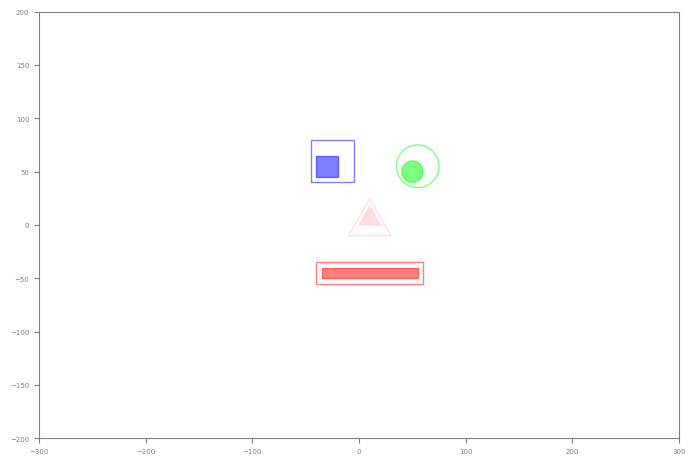

In [ ]:
canvas = Canvas()
canvas.render(shapes=shapes)

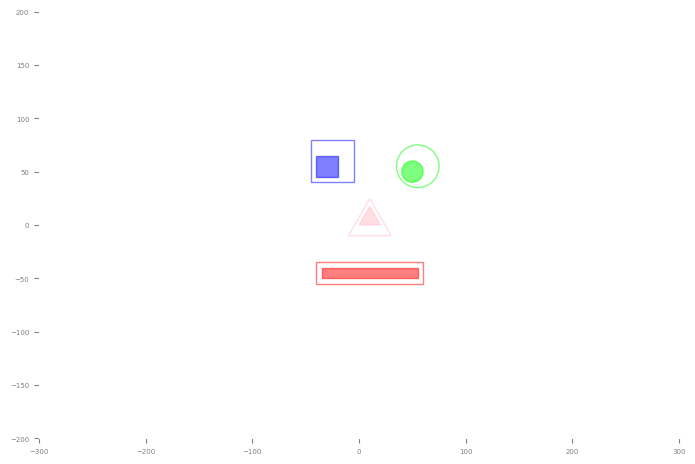

In [ ]:
canvas.render(shapes=shapes, show_box=False)

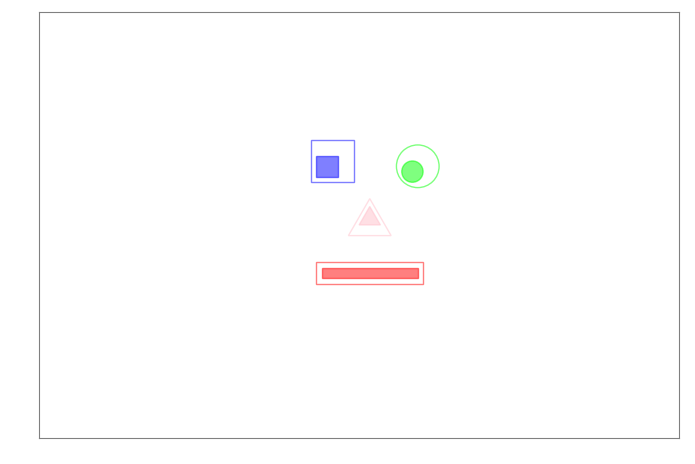

In [ ]:
canvas.render(shapes=shapes, show_coordinates=False)

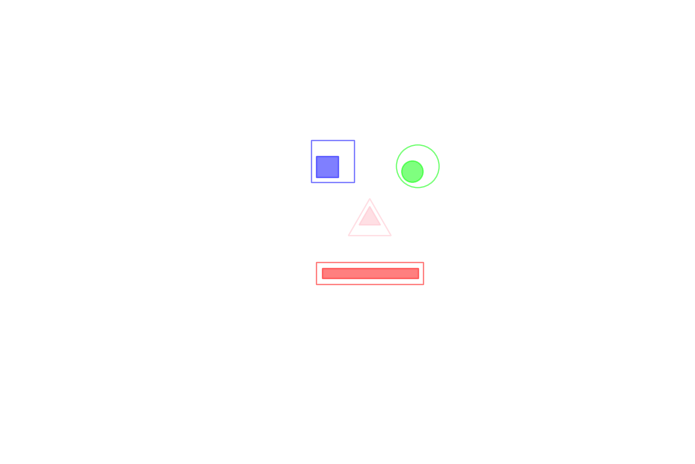

In [ ]:
canvas.render(shapes=shapes, show_box=False, show_coordinates=False)